## hw7

- below we present the work done during day 13. The exercises are a continuation of this work using the same data
- ensure to run all the code until the section about exercises

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

In [ ]:
#forecast icecream sales

In [2]:
data=pd.read_csv('icecream_sales_forecasting.csv',sep=';', \
                 parse_dates=['date'],dayfirst=True)

FileNotFoundError: ignored

In [ ]:
data.head()

,date,Softice_Ordered,IceCream_Ordered,Unique_Buyers,Total_Ordered,Total_Ordered_Cummulative,Unique_Buyers_Cummulative
0,2021-11-09,0.0,0.0,09.00,0.0,00.00,09.00
1,2021-11-10,0.0,0.0,02.00,0.0,00.00,11.00
2,2021-11-11,0.0,2.0,12.00,2.0,02.00,23.00
3,2021-11-12,0.0,3.0,11.00,3.0,05.00,34.00.00
4,2021-11-13,0.0,0.0,03.00,0.0,05.00,37.00.00


In [ ]:
min(data['date']),max(data['date'])

(Timestamp('2021-11-09 00:00:00'), Timestamp('2022-06-09 00:00:00'))

In [ ]:
data.describe()

,Softice_Ordered,IceCream_Ordered,Total_Ordered
count,213.000000,213.000000,213.000000
mean,0.281690,1.586854,1.868545
std,0.633568,2.753765,2.993956
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,2.000000,3.000000
max,4.000000,18.000000,18.000000


In [ ]:
print(data.dtypes)

date                         datetime64[ns]
Softice_Ordered                     float64
IceCream_Ordered                    float64
Unique_Buyers                        object
Total_Ordered                       float64
Total_Ordered_Cummulative            object
Unique_Buyers_Cummulative            object
dtype: object


In [ ]:
#data['Unique_Buyers']=data['Unique_Buyers'].astype('float')

In [ ]:
data['Total_Ordered_Cummulative_']=data['Total_Ordered'].cumsum()

In [ ]:
data.head(10)

,date,Softice_Ordered,IceCream_Ordered,Unique_Buyers,Total_Ordered,Total_Ordered_Cummulative,Unique_Buyers_Cummulative,Total_Ordered_Cummulative_
0,2021-11-09,0.0,0.0,09.00,0.0,00.00,09.00,0.0
1,2021-11-10,0.0,0.0,02.00,0.0,00.00,11.00,0.0
2,2021-11-11,0.0,2.0,12.00,2.0,02.00,23.00,2.0
3,2021-11-12,0.0,3.0,11.00,3.0,05.00,34.00.00,5.0
4,2021-11-13,0.0,0.0,03.00,0.0,05.00,37.00.00,5.0
5,2021-11-14,0.0,0.0,00.00,0.0,05.00,37.00.00,5.0
6,2021-11-15,0.0,0.0,07.00,0.0,05.00,44.00.00,5.0
7,2021-11-16,0.0,0.0,10.00,0.0,05.00,54.00.00,5.0
8,2021-11-17,1.0,1.0,09.00,2.0,07.00,63.00.00,7.0
9,2021-11-18,0.0,0.0,05.00,0.0,07.00,68.00.00,7.0


<AxesSubplot:xlabel='date'>

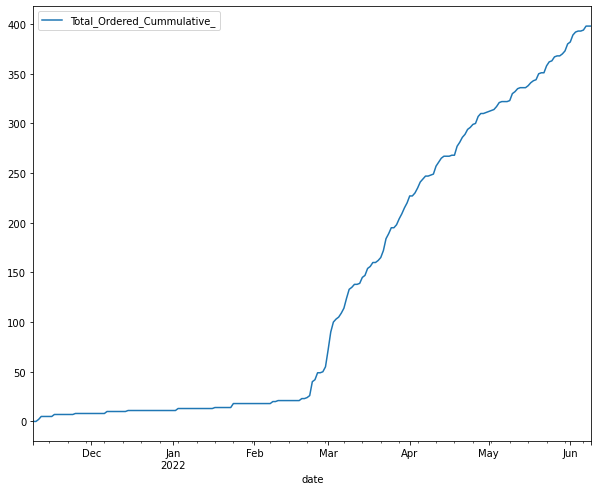

In [ ]:
data.plot(x='date',y='Total_Ordered_Cummulative_', kind='line', figsize=(10,8))

In [ ]:
data.corr()

,Softice_Ordered,IceCream_Ordered,Total_Ordered,Total_Ordered_Cummulative_
Softice_Ordered,1.000000,0.280604,0.469708,0.382990
IceCream_Ordered,0.280604,1.000000,0.979155,0.242619
Total_Ordered,0.469708,0.979155,1.000000,0.304201
Total_Ordered_Cummulative_,0.382990,0.242619,0.304201,1.000000


In [ ]:
import seaborn as sns

<AxesSubplot:>

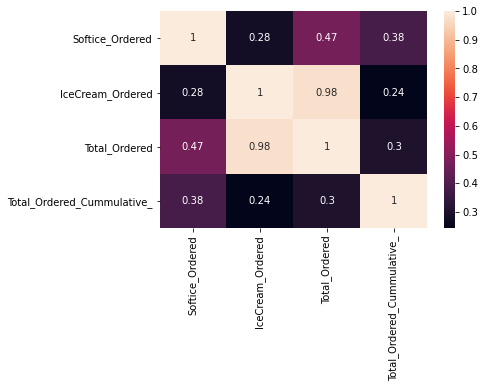

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
x=np.array(data['date'].index.values)

In [ ]:
x[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [ ]:
x.shape

(213,)

In [ ]:
y=np.array(data['Total_Ordered_Cummulative_'].values)

In [ ]:
y[0:10]

array([0., 0., 2., 5., 5., 5., 5., 5., 7., 7.])

In [ ]:
y.shape

(213,)

In [ ]:
slope, intercept, rvalue, pvalue, stderr = sp.linregress(x,y)

In [ ]:
"rvalue={:0.2f} pvalue={:0.2f} stderr={:0.2f}".format(rvalue, pvalue, stderr)

'rvalue=0.93 pvalue=0.00 stderr=0.06'

In [ ]:
print('rvalue=', round(rvalue,2),'\n','pvalue=', round(pvalue,2),'\n','stderr=',round(stderr,2))

rvalue= 0.93 
 pvalue= 0.0 
 stderr= 0.06


In [ ]:
slope, intercept

(2.128017266001227, -91.44776446843056)

In [ ]:
x1=x

In [ ]:
y1=slope*x1+intercept

In [ ]:
data['prediction']=y1

<AxesSubplot:xlabel='date'>

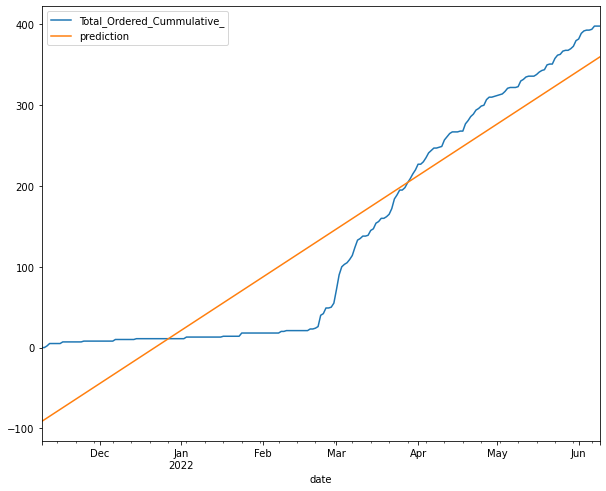

In [ ]:
data.plot(x='date',y=['Total_Ordered_Cummulative_','prediction'], kind='line', figsize=(10,8))

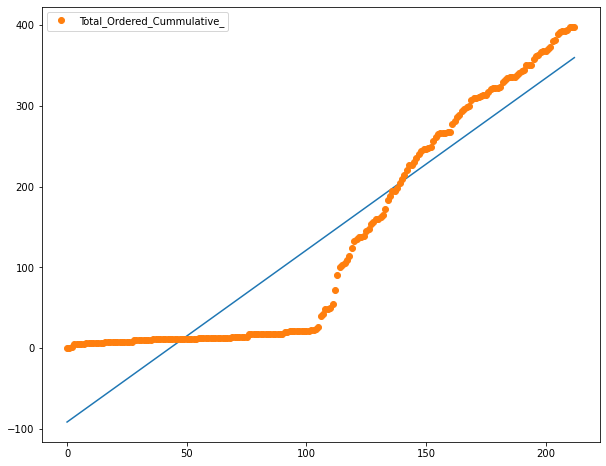

In [ ]:
f,ax=plt.subplots(1,1)
ax.plot(x1,y1)
data['Total_Ordered_Cummulative_'].plot(ax=ax,marker='o',ls='',figsize=(10,8))
ax.legend()

In [ ]:
#exercise: 
# perform linear fit for the data from 1st of March 2022. 
# plot the data and fitted line int the same line chart 
# plot all the attributes the linregress function returns  

In [ ]:
# your code here

## Linear Regression using sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train.reshape((-1, 1)), y_train)

LinearRegression()

In [ ]:
regression_model.coef_[0]

2.140590840814171

In [ ]:
regression_model.intercept_

-91.9320191488147

In [ ]:
regression_model.score(X_train.reshape((-1, 1)),y_train)

0.8735228278454048

In [ ]:
regression_model.score(X_test.reshape((-1, 1)),y_test)

0.8607363334234126

In [ ]:
# exercise: plot the original data with the line fitted using the parametres from sklearn model (y=coef_*x+intercept_)